# Анализ сроков госпитализации пациентов в стационарах медицинского центра

- Автор: Березинский Вадим Сергеевич
- Дата: 07.06.2025

### Цели и задачи проекта

**Цель исследования:** проанализировать данные федерального медицинского центра ФГБОУ ВО СПбГПМУ о сроках госпитализации пациентов в стационарах медицинского центра.

**Задачи:**
1. Провести предобработку данных.
2. Провести исследовательский анализ данных:
    - Изучить распределение длительности госпитализации пациентов.
    - Изучить среднюю длительность госпитализации по отделениям, в том числе на примере десяти отделений, где длительности госпитализации пациентов наибольшая.
    - Исследовать динамику количества поступивших пациентов в разные месяцы (учитывая различия в годах).
3. Проверить гипотезы:
   - Проверить, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока.
   - Проверить, превышает ли средняя длительность госпитализации пациентов 10 дней.
   - Проверить, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Анализ проводится на основе следующих наборов данных:

Таблица `hospital.csv` — данные федерального медицинского центра ФГБОУ ВО СПбГПМУ.

Поля таблицы `hospital.csv`:

`ДАТА_ПОСТУПЛЕНИЯ` — дата поступления пациента в отделение;

`ДАТА_ВЫПИСКИ` — дата выписки пациента из отделения;

`УНИКАЛЬНЫЙ_ID` — идентификатор пациента;

`НОМЕР_ИБ` — системное поле (номер истории болезни (медицинской карты));

`ШИФР` — системное поле;

`РЕГИОН` — регион проживания пациента;

`ПЛАТЕЛЬЩИК` — наименование плательщика;

`ИСТОЧНИК_ФИНАНСИРОВАНИЯ` — ОМС или другой вариант;

`ОТДЕЛЕНИЕ` — название отделения;

`ПРОФИЛЬ` — профиль отделения (например, терапия, хирургия);

`КОЙКО_ДНИ` — количество дней лечения в стационаре;

`ПЛАНОВО_ЭКСТРЕННО` — поступил планово или экстренно;

`КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ` — код диагноза при поступлении;

`КОД_МКБ_ПРИ_ВЫПИСКЕ` — код диагноза при выписке.


### Предварительная обработка данных

Загрузим данные из таблиц и познакомимся с ними.

In [6]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеки для статистических расчетов
import scipy.stats as st
import numpy as np

Выгружаем таблицу в датафрейм:

In [8]:
hospital = pd.read_csv('hospital.csv')

In [9]:
hospital.head()

,ДАТА_ПОСТУПЛЕНИЯ,ДАТА_ВЫПИСКИ,УНИКАЛЬНЫЙ_ID,НОМЕР_ИБ,ШИФР,РЕГИОН,ПЛАТЕЛЬЩИК,ИСТОЧНИК_ФИНАНСИРОВАНИЯ,ОТДЕЛЕНИЕ,ПРОФИЛЬ,КОЙКО_ДНИ,ПЛАНОВО_ЭКСТРЕННО,КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ,КОД_МКБ_ПРИ_ВЫПИСКЕ
0,01.01.2019,10.01.2019,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10.0,Экстренная,S61.7,S66.4
1,01.01.2019,01.01.2019,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
2,01.01.2019,01.01.2019,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1.0,Экстренная,K37,K63.8
3,01.01.2019,07.01.2019,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7.0,Экстренная,B27.9,J03.9
4,01.01.2019,05.01.2019,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5.0,Плановая,O42.9,O82.1


In [10]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125261 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ДАТА_ПОСТУПЛЕНИЯ         125261 non-null  object 
 1   ДАТА_ВЫПИСКИ             125261 non-null  object 
 2   УНИКАЛЬНЫЙ_ID            125261 non-null  int64  
 3   НОМЕР_ИБ                 125261 non-null  int64  
 4   ШИФР                     125261 non-null  object 
 5   РЕГИОН                   56391 non-null   object 
 6   ПЛАТЕЛЬЩИК               125261 non-null  object 
 7   ИСТОЧНИК_ФИНАНСИРОВАНИЯ  125261 non-null  object 
 8   ОТДЕЛЕНИЕ                125261 non-null  object 
 9   ПРОФИЛЬ                  125261 non-null  object 
 10  КОЙКО_ДНИ                125261 non-null  float64
 11  ПЛАНОВО_ЭКСТРЕННО        125261 non-null  object 
 12  КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ  125253 non-null  object 
 13  КОД_МКБ_ПРИ_ВЫПИСКЕ      125257 non-null  object 
dtypes: f

In [11]:
hospital.columns

Index(['ДАТА_ПОСТУПЛЕНИЯ', 'ДАТА_ВЫПИСКИ', 'УНИКАЛЬНЫЙ_ID', 'НОМЕР_ИБ', 'ШИФР',
       'РЕГИОН', 'ПЛАТЕЛЬЩИК', 'ИСТОЧНИК_ФИНАНСИРОВАНИЯ', 'ОТДЕЛЕНИЕ',
       'ПРОФИЛЬ', 'КОЙКО_ДНИ', 'ПЛАНОВО_ЭКСТРЕННО', 'КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ',
       'КОД_МКБ_ПРИ_ВЫПИСКЕ'],
      dtype='object')

Итак, мы видим, что таблица `hospitals` состоит из 14 столбцов и 125261 строки. Содержимое ячеек соответствует описанию данных. 

Названия столбцов, хоть и даны на кириллице, но не длинные, даны в одном регистре (верхнем) и не содержат пробелов, то есть в целом удобны для использования. Учитывая специфические для отрасли здравоохранения данные, предлагаем сохранить имеющиеся наименования стоолбцов.

Явные пропуски в большом количестве содержатся в столбце `РЕГИОН` - около половины значений не заполнено. Поскольку речь идет о федеральном медицинском центре, вероятно, данные о регионе пациента не носят обязательный для заполнения характер при поступлении в стационар. Исходя из задач исследования, сведения о регионе нам не понадобятся, поэтому предлагаем с пропусками в этом столбце ничего не делать.

Еще небольшое количество пропусков имеется в столбцах `КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ` и `КОД_МКБ_ПРИ_ВЫПИСКЕ`. Сведения о коде по МКБ для целей исследования также не потребуются, так что пропуски можно оставить.

Тип данных в столбцах `ШИФР`, `РЕГИОН`, `ПЛАТЕЛЬЩИК`, `ИСТОЧНИК_ФИНАНСИРОВАНИЯ`, `ОТДЕЛЕНИЕ`, `ПРОФИЛЬ`, `ПЛАНОВО_ЭКСТРЕННО`, `КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ`, `КОД_МКБ_ПРИ_ВЫПИСКЕ` выбран корректно - `object`, поскольку столбцы содержат строковые данные.

Тип данных в столбцах `ДАТА_ПОСТУПЛЕНИЯ`, `ДАТА_ВЫПИСКИ` необходимо привести к формату даты.

Тип данных в столбце `КОЙКО_ДНИ` целесообразно привести к целочисленному.

In [13]:
# Приведем столбцы `ДАТА_ПОСТУПЛЕНИЯ` и `ДАТА_ВЫПИСКИ` к типу `datetime64`:

hospital['ДАТА_ПОСТУПЛЕНИЯ'] = pd.to_datetime(hospital['ДАТА_ПОСТУПЛЕНИЯ'],format="%d.%m.%Y")
hospital['ДАТА_ВЫПИСКИ'] = pd.to_datetime(hospital['ДАТА_ВЫПИСКИ'],format="%d.%m.%Y")

In [14]:
# Приведем столбец `КОЙКО_ДНИ` к целочисленному типу:

hospital['КОЙКО_ДНИ'] = pd.to_numeric(hospital['КОЙКО_ДНИ'],downcast='integer')

In [15]:
hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125261 entries, 0 to 125260
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ДАТА_ПОСТУПЛЕНИЯ         125261 non-null  datetime64[ns]
 1   ДАТА_ВЫПИСКИ             125261 non-null  datetime64[ns]
 2   УНИКАЛЬНЫЙ_ID            125261 non-null  int64         
 3   НОМЕР_ИБ                 125261 non-null  int64         
 4   ШИФР                     125261 non-null  object        
 5   РЕГИОН                   56391 non-null   object        
 6   ПЛАТЕЛЬЩИК               125261 non-null  object        
 7   ИСТОЧНИК_ФИНАНСИРОВАНИЯ  125261 non-null  object        
 8   ОТДЕЛЕНИЕ                125261 non-null  object        
 9   ПРОФИЛЬ                  125261 non-null  object        
 10  КОЙКО_ДНИ                125261 non-null  int16         
 11  ПЛАНОВО_ЭКСТРЕННО        125261 non-null  object        
 12  КОД_МКБ_ПРИ_ПОСТ

Проверим датафрейм на наличие явных и скрытых дубликатов

In [17]:
# Проверим явные дубликаты по сочетанию столбцов 'ДАТА_ПОСТУПЛЕНИЯ','УНИКАЛЬНЫЙ_ID','НОМЕР_ИБ', которое представляется уникальным:

hospital.duplicated(subset=['ДАТА_ПОСТУПЛЕНИЯ','УНИКАЛЬНЫЙ_ID','НОМЕР_ИБ']).sum()

4432

In [18]:
# Посчитаем долю явных дубликатов от общего количества строк:
hospital.duplicated(subset=['ДАТА_ПОСТУПЛЕНИЯ','УНИКАЛЬНЫЙ_ID','НОМЕР_ИБ']).sum() / hospital.shape[0]

0.03538212212899466

3.5% данных дублируется по сочетанию столбцов 'ДАТА_ПОСТУПЛЕНИЯ','УНИКАЛЬНЫЙ_ID','НОМЕР_ИБ', которое представляется уникальным. Удалим дубликаты.

In [20]:
hospital = hospital.drop_duplicates(subset=['ДАТА_ПОСТУПЛЕНИЯ','УНИКАЛЬНЫЙ_ID','НОМЕР_ИБ'])

In [21]:
hospital.duplicated(subset=['ДАТА_ПОСТУПЛЕНИЯ','УНИКАЛЬНЫЙ_ID','НОМЕР_ИБ']).sum()

0

#### Промежуточный вывод

Таблица `hospitals` содржит данные о госпитализации пациентов в федеральный медицинский центр.

1. Проведены следующие работы по оптимизации типов данных:
   - данные в столбцах `ДАТА_ПОСТУПЛЕНИЯ`, `ДАТА_ВЫПИСКИ` приведены к типу даты. 
   - данные в столбце `КОЙКО_ДНИ` приведены к целочисленному типу с понижением разрядности.
2. Пропуски в датасете оставлены без обработки, поскольку столбцы с пропущенными значениями не потребуются для решений задач исследования.
3. Заголовки столбцов оставлены без изменения, поскольку в целом удобны для использования.
4. 3.5% данных дублируется по сочетанию столбцов 'ДАТА_ПОСТУПЛЕНИЯ','УНИКАЛЬНЫЙ_ID','НОМЕР_ИБ', которое представляется уникальным, дубликаты удалены.

## Исследовательский анализ данных

### Распределение длительности госпитализации пациентов

Изучим распределение длительности госпитализации пациентов. Данные по длительность госпитализации содержатся в столбце `КОЙКО_ДНИ`. Построим по этому столбцу гистограмму и боксплот, чтобы оценить распределение. А также получим статистики по этому столбцу.

In [24]:
hospital['КОЙКО_ДНИ'].describe()

count    120829.000000
mean          8.730992
std           8.776689
min           1.000000
25%           3.000000
50%           7.000000
75%          12.000000
max         266.000000
Name: КОЙКО_ДНИ, dtype: float64

Медианное значение составляет 7 койко-дней, при этом среднее значение составляет 8.7 койко-дней, что отличается от медианы и может свидетельствовать о наличии выбросов. Максимальное значение составляет 266 дней, что выглядит как выброс в данных, но требует проверки.

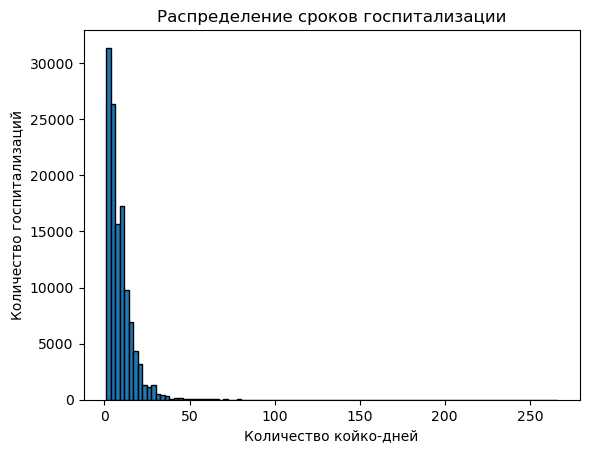

In [26]:
hospital['КОЙКО_ДНИ'].plot(kind='hist',
                          bins=100,
                          title='Распределение сроков госпитализации',
                          xlabel='Количество койко-дней',
                          ylabel='Количество госпитализаций',
                          edgecolor='black')
plt.show()

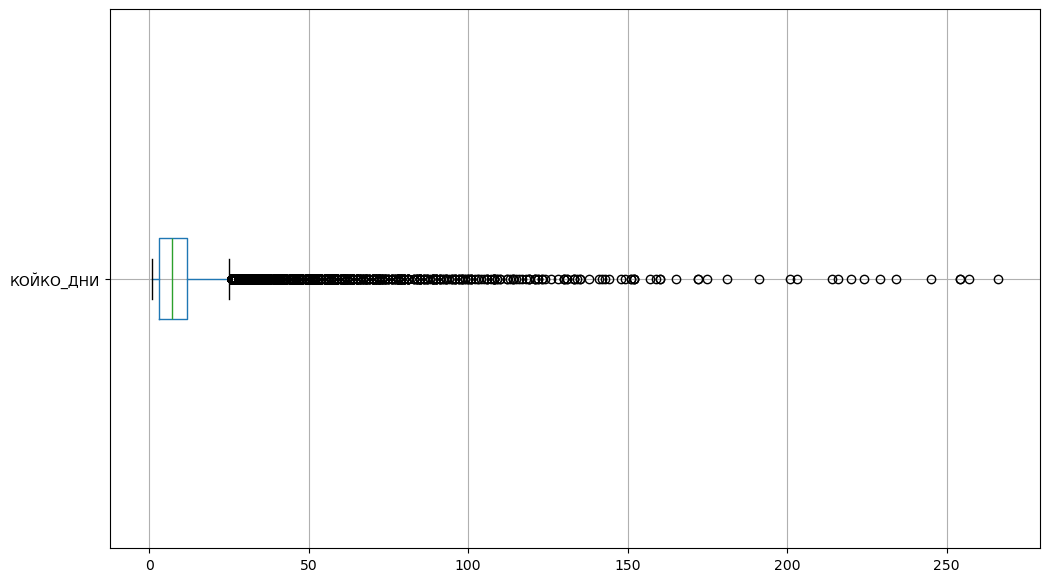

In [27]:
boxplot = hospital.boxplot(column='КОЙКО_ДНИ',vert=False,figsize=(12,7))
boxplot.set_title='Распределение сроков госпитализации'
boxplot.set_xlabel='Количество койко-дней'
plt.show()

### Промежуточный вывод

На гистограмме и боксплоте мы видим, что большая часть госпитализаций завершается в срок до 25 дней, однако есть случаи длительной госпитализации вплоть до 266 дней и поскольку случаи длительных госпитализаций встречаются на всем участке шкалы от 25 до 266, показывая плавную тенденцию к уменьшению, их нельзя считать выбросами в данных, а необходимо проанализировать.

### Распределение длительности госпитазаций по отделениям

Изучим среднюю длительность госпитализации по отделениям, а затем изучим десять отделений, где длительности госпитализации пациентов наибольшая.

In [30]:
# Сгруппируем данные по отделениям и выведем средние сроки госпитализации:

hospital_group = hospital.groupby('ОТДЕЛЕНИЕ')['КОЙКО_ДНИ'].mean().sort_values(ascending=False)

print(hospital_group)

ОТДЕЛЕНИЕ
Отделение анестезиологии-реанимации                                                                          45.179487
ПЦ ОАРИТН №1 (новорожденных)                                                                                 28.723214
ПЦ Отделение Анестезиологии-реанимации для детей с кардиохирургической патологией                            26.438095
ПЦ Отделение патологии новорожденных и детей грудного возраста                                               22.204441
ПЦ Отделение вспомогательных репродуктивных технологий ДС                                                    21.297802
Дневной стационар Кожно-венерологического отделения                                                          14.027322
Дневной стационар Гастроэнтерологического отделения                                                          13.339286
Микрохирургическое отделение                                                                                 13.293007
Педиатрическое отделение №1           

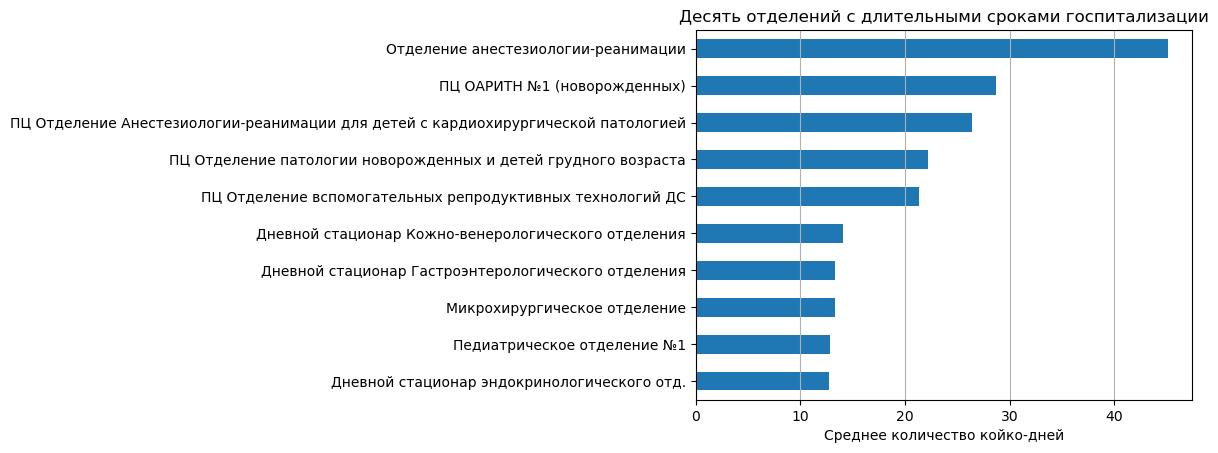

In [31]:
hospital_group.head(10).sort_values().plot(kind='barh',
                            title='Десять отделений с длительными сроками госпитализации',
                            ylabel='',
                            xlabel='Среднее количество койко-дней',
                            rot=0)
plt.grid(axis='x')
plt.show()

### Промежуточный вывод

Самые длительные госпитализации наблюдаются в Отделении анестезиологии-реанимации, они составляют в среднем 45 койко-дней. Также большие сроки госпитализации в отделениях Перинатального центра (реанимации новорожденных, реанимации детей с кардиохирургической патологией, патологии новорожденных, вспомогательных репродуктивных технологий - 28, 26, 22 и 21 койко-дней соответственно). Также длительная госпитализация наблюдается в дневных стационарах кожно-венерологического, гастроэнтерологического и эндокринологического отделений, в микрохирургическом и педиатрическом отделениях.

#### Динамика количества поступивших пациентов в разные месяцы

Исследуем динамику количества поступивших пациентов в разные месяцы (учитывая различия в годах).

In [34]:
# Выделим столбец с месяцем и годом поступления:

hospital['МЕСЯЦ_ПОСТУПЛЕНИЯ'] = hospital['ДАТА_ПОСТУПЛЕНИЯ'].dt.month
hospital['ГОД_ПОСТУПЛЕНИЯ'] = hospital['ДАТА_ПОСТУПЛЕНИЯ'].dt.to_period('Y')
hospital.head()

,ДАТА_ПОСТУПЛЕНИЯ,ДАТА_ВЫПИСКИ,УНИКАЛЬНЫЙ_ID,НОМЕР_ИБ,ШИФР,РЕГИОН,ПЛАТЕЛЬЩИК,ИСТОЧНИК_ФИНАНСИРОВАНИЯ,ОТДЕЛЕНИЕ,ПРОФИЛЬ,КОЙКО_ДНИ,ПЛАНОВО_ЭКСТРЕННО,КОД_МКБ_ПРИ_ПОСТУПЛЕНИИ,КОД_МКБ_ПРИ_ВЫПИСКЕ,МЕСЯЦ_ПОСТУПЛЕНИЯ,ГОД_ПОСТУПЛЕНИЯ
0,2019-01-01,2019-01-10,858042000,1,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Микрохирургическое отделение,Сосудистой хирургии,10,Экстренная,S61.7,S66.4,1,2019
1,2019-01-01,2019-01-01,993109000,3,5.13.1,NaN,"СПб филиал ООО ""СМК РЕСО - Мед""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1,Экстренная,K37,K63.8,1,2019
2,2019-01-01,2019-01-01,993111000,4,5.12.1,NaN,"ООО ""Капитал Медицинское Страхование""",ОМС,Хирургическое отделение №3,Гнойные хирургические,1,Экстренная,K37,K63.8,1,2019
3,2019-01-01,2019-01-07,993110000,2,5.4.1,NaN,"ОАО ""ГСМК"" СПб",ОМС,Инфекционное отделение №1,Инфекционные,7,Экстренная,B27.9,J03.9,1,2019
4,2019-01-01,2019-01-05,987185000,5,1.1.1,NaN,Коммерческие,Наличный расчет,ПЦ Акушерское физиологическое отделение,Для беременных и рожениц,5,Плановая,O42.9,O82.1,1,2019


In [35]:
# Группируем данные о количестве госпитализаций по годам и месяцам:

hospital_group_1 = hospital.groupby(['ГОД_ПОСТУПЛЕНИЯ','МЕСЯЦ_ПОСТУПЛЕНИЯ'])['УНИКАЛЬНЫЙ_ID'].count().reset_index()
print(hospital_group_1)

   ГОД_ПОСТУПЛЕНИЯ  МЕСЯЦ_ПОСТУПЛЕНИЯ  УНИКАЛЬНЫЙ_ID
0             2019                  1           1775
1             2019                  2           1927
2             2019                  3           2080
3             2019                  4           2205
4             2019                  5           2020
5             2019                  6           1957
6             2019                  7           1102
7             2019                  8           1183
8             2019                  9           2020
9             2019                 10           2598
10            2019                 11           2366
11            2019                 12           2124
12            2020                  1           2213
13            2020                  2           2269
14            2020                  3           2073
15            2020                  4           1081
16            2020                  5            958
17            2020                  6         

In [36]:
hospital_group_1.columns

Index(['ГОД_ПОСТУПЛЕНИЯ', 'МЕСЯЦ_ПОСТУПЛЕНИЯ', 'УНИКАЛЬНЫЙ_ID'], dtype='object')

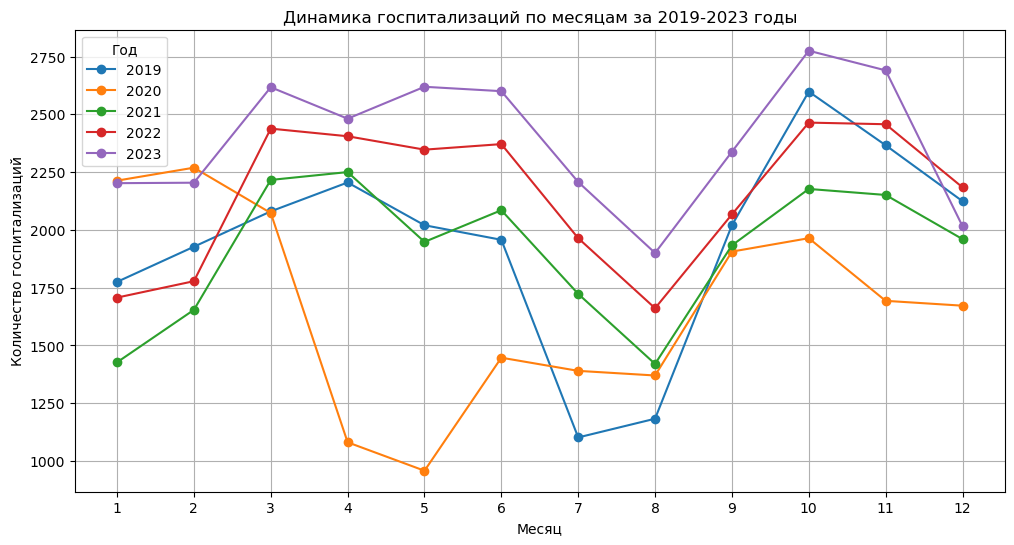

In [37]:
# Строим графики с динамикой госпитализаций по годам и месяцам:

# Создаем фигуру fig и ось ax для графика, задаем размеры:
fig, ax = plt.subplots(figsize=(12,6))

# Строим линейный график по месяцам и повторяем его в цикле для каждого года:

# Для каждого уникального значения в столбце 'ГОД_ПОСТУПЛЕНИЯ' задаем цикл 

for year in hospital_group_1['ГОД_ПОСТУПЛЕНИЯ'].unique():

# Задаем переменую с данными за год    
    data_year = hospital_group_1[hospital_group_1['ГОД_ПОСТУПЛЕНИЯ'] == year]

# Строим линию, по оси х откладываем значения из 'МЕСЯЦ_ПОСТУПЛЕНИЯ', по оси у откладываем агрегированные значения из 'УНИКАЛЬНЫЙ_ID':
    
    ax.plot(data_year['МЕСЯЦ_ПОСТУПЛЕНИЯ'],data_year['УНИКАЛЬНЫЙ_ID'],marker='o',label=str(year))

# Настраиваем отображение графика:

ax.set_xlabel('Месяц')
ax.set_ylabel('Количество госпитализаций')
ax.set_title('Динамика госпитализаций по месяцам за 2019-2023 годы')
ax.set_xticks(range(1,13))
ax.legend(title='Год')
ax.grid(True)

plt.show()

### Промежуточный вывод

По графикам, показывающим динамику количества госпитализаций по месяцам мы видим, что нагрузка на стационары неравномерна в течение года. 

Так, можно отметить сильный спад в количестве поступлений пациентов в июле-августе, эта тенденция повторяется каждый наблюдаемый год. Также снижается нарузка на стационар, но менее выраженно, в январе и декабре. Наоборот, пиковые нагрузки наблюдаются с марта по июнь и с сентября по ноябрь. То есть в работе стационарных отделений прослеживается ярко выраженная сезонность.

При этом на графике видно, что один год, а именно 2020 сильно отличается от других - в апрле-мае 2020 года произошел резкий спад количества госпитализаций, и весь последующий год количество госпитализаций было ниже показателя в последующие годы. Вероятно, это связано с пандемией коронавируса, законодательным ограничением количества нековидных госпитализаций, а также перепрофилированием ряда медицинских организаций и отделений. 

## Проверка гипотез

### Отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока

Проверим, отличается ли средняя длительность госпитализации пациентов от стандартного семидневного срока.

Действовать будем по алгоритму проверки гипотез:

**1. Определяем тип гипотезы.** Мы предполагаем, что средняя длительность госпитализации пациентов отличается от стандартного семидневного срока, то есть альтернативная гипотеза является двусторонней, поскольку нас интересует отклонение в любую сторону. Длительность госпитализации будем считать по столбцу `КОЙКО_ДНИ`.

**2. Формулирует нулевую и альтернативную гипотезы.**

Нулевая гипотеза(Н0): средняя длительность госпитализации пациентов равна стандартному семидневному сроку.

Альтернативная гипотеза (П1): средняя длительность госпитализации пациентов отличается от стандартного семидневного срока.

**3. Выбираем уровень значимости α**
Поскольку ситуация обычная и не требует повышенной осторожности, то выбираем уровень значимости α = 0.05

**4. Выбираем статистический тест для проверки гипотезы.** Поскольку у нас одна выборка (столбец `КОЙКО_ДНИ`) и необходимо проверить отличие от известного значения (стандартный семидневный срок), то для этих целей походит одновыборочный t-тест Стьюдента.

In [40]:
# Запишем массив в переменную:

koiko_dni = hospital['КОЙКО_ДНИ']

# Запишем в переменную предполагаемое среднее гипотезы, на равенство которому делаем тест:

expected_mean_period = 7

# Запишем в переменную выбранное значение уровня значимости:

alpha = 0.05

# Проведем одновыборочный t-тест Стьюдента:

results = st.ttest_1samp(koiko_dni,expected_mean_period,alternative='two-sided')

# Выведем р-значение:

print('p-значение:',results.pvalue)

# Проверим гипотезу, сравнив р-значение с уровнем значимости:

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


#### Промежуточный вывод

Проведя одновыборочный t-тест Стьюдента, мы получили нулевое р-значение, что можно интерпретировать так: если верно, что средняя длительность госпитализации пациентов равна стандартному семидневному сроку, то вероятность получить такую выборку значений, как представлена в столбце `КОЙКО_ДНИ` составляет 0%, это ниже заданного уровня значимости, что позволяет нам отвегнуть нулевую гипотезу и утверждать, что средняя длительность госпитализации пациентов отличается от стандартного семидневного срока.

### Превышает ли средняя длительность госпитализации пациентов 10 дней

Проверим, превышает ли средняя длительность госпитализации пациентов 10 дней.

Действовать будем по алгоритму проверки гипотез:

**1. Определяем тип гипотезы.** Мы предполагаем, что средняя длительность госпитализации пациентов превышает десять дней, то есть альтернативная гипотеза является одноторонней, а именно - правосторонней, поскольку нас интересует отклонение в большую сторону. Длительность госпитализации будем считать по столбцу `КОЙКО_ДНИ`.

**2. Формулирует нулевую и альтернативную гипотезы.**

Нулевая гипотеза(Н0): средняя длительность госпитализации пациентов равна десятидневному сроку.

Альтернативная гипотеза (П1): средняя длительность госпитализации пациентов превышает десятидневный срок.

**3. Выбираем уровень значимости α**
Поскольку ситуация обычная и не требует повышенной осторожности, то выбираем уровень значимости α = 0.05

**4. Выбираем статистический тест для проверки гипотезы.** Поскольку у нас одна выборка (столбец `КОЙКО_ДНИ`) и необходимо проверить отличие от известного значения (десятидневный срок), то для этих целей походит одновыборочный t-тест Стьюдента.

In [76]:
# Запишем массив в переменную:

koiko_dni = hospital['КОЙКО_ДНИ']

# Запишем в переменную предполагаемое среднее гипотезы, на равенство которому делаем тест:

expected_mean_period = 10

# Запишем в переменную выбранное значение уровня значимости:

alpha = 0.05

# Проведем одновыборочный t-тест Стьюдента:

results = st.ttest_1samp(koiko_dni,expected_mean_period,alternative='greater')

# Выведем р-значение:

print('p-значение:',results.pvalue)

# Проверим гипотезу, сравнив р-значение с уровнем значимости:

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


#### Промежуточный вывод

Проведя одновыборочный t-тест Стьюдента, мы получили р-значение равное 1, что можно интерпретировать так: если верно, что средняя длительность госпитализации пациентов не превышает десятидневный срок, то вероятность получить такую выборку значений, как представлена в столбце `КОЙКО_ДНИ` составляет 100%, это выше заданного уровня значимости, что не позволяет нам отвегнуть нулевую гипотезу и утверждать, что средняя длительность госпитализации пациентов превышает десятидневный срок. При этом необходимо отметить, что данный вывод не подтверждает нулевую гипотезу, то есть мы не можем утверждать, что средняя длительность госпитализации пациентов равна десятидневному сроку.

#### Отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами

Проверим, отличается ли средняя длительность лечения в стационаре между плановыми и экстренными пациентами.

Действовать будем по алгоритму проверки гипотез:

**1. Определяем тип гипотезы.** Мы предполагаем, что средняя длительность лечения в стационаре между плановыми и экстренными пациентами разная, то есть альтернативная гипотеза является двусторонней, поскольку нас интересует отклонение в любую сторону. Длительность госпитализации будем считать по столбцу `КОЙКО_ДНИ`. Группы пациентов сформируем по столбцу `ПЛАНОВО_ЭКСТРЕННО`, имеющему значения `Экстренная` `Плановая`.

**2. Формулирует нулевую и альтернативную гипотезы.**

Нулевая гипотеза(Н0): средняя длительность лечения в стационаре между плановыми и экстренными пациентами не различается.

Альтернативная гипотеза (П1): средняя длительность лечения в стационаре между плановыми и экстренными пациентами разная.

**3. Выбираем уровень значимости α**
Поскольку ситуация обычная и не требует повышенной осторожности, то выбираем уровень значимости α = 0.05

**4. Выбираем статистический тест для проверки гипотезы.** Поскольку у нас две выборки и вариативность данных в обеих выборках можно считать одинаковой (в обеих выборках представлен случайный набор пациентов, попавших в больницу), то для этих целей походит двухвыборочный t-тест Стьюдента.

In [87]:
# Проверим, что столбец 'ПЛАНОВО_ЭКСТРЕННО' содердит только нужные нам значения:

form_med_help = hospital['ПЛАНОВО_ЭКСТРЕННО'].unique()
print(form_med_help)

['Экстренная' 'Плановая']


In [91]:
# Записываем в переменные наборы данных по двум группам:

group_plan = hospital['КОЙКО_ДНИ'][hospital['ПЛАНОВО_ЭКСТРЕННО']=='Плановая']
group_extr = hospital['КОЙКО_ДНИ'][hospital['ПЛАНОВО_ЭКСТРЕННО']=='Экстренная']

# Запишем в переменную выбранное значение уровня значимости:

alpha = 0.05

# Проведем двухвыборочный t-тест Стьюдента:

results = st.ttest_ind(group_plan,group_extr,alternative='two-sided')

# Выведем р-значение:

print('p-значение:',results.pvalue)

# Проверим гипотезу, сравнив р-значение с уровнем значимости:

if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.0
Отвергаем нулевую гипотезу


#### Промежуточный вывод

Проведя двухвыборочный t-тест Стьюдента, мы получили р-значение равное 0, что можно интерпретировать так: если средняя длительность лечения в стационаре между плановыми и экстренными пациентами не различается, то вероятность получить такие выборки значений, как представлены в столбце `КОЙКО_ДНИ` составляет 0%, что не превышает объевленный нами уровень значимости 5%. Полученный результат позволяет нам отвегнуть нулевую гипотезу и согласиться с альтернативной гипотезой, утверждающей, что средняя длительность лечения в стационаре между плановыми и экстренными пациентами разная.

## Итоговый вывод и рекомендации

**1. Общий обзор проделанной работы.**

В ходе исследования был проведен анализ данных федерального медицинского центра ФГБОУ ВО СПбГПМУ о сроках госпитализации пациентов в стационарах и проверены гипотезы об отличии средней длительности госпитализации пациентов от стандартного семидневного срока, десятидневного срока, а также о различиях средних сроков госпитализации между плановыми и экстренными пациентами.

**2. Ответы на исследовательские вопросы, или главные выводы.**

1. Изучив распределение сроков госпитализации установили, что большая часть госпитализаций завершается в срок до 25 дней, однако есть случаи длительной госпитализации вплоть до 266 дней, при этом такие случаи нельзя считать выбросами в данных.

2. Изучив распределение сроков госпитализации по отделениям медицинского центра установили, что самые длительные госпитализации наблюдаются в Отделении анестезиологии-реанимации, они составляют в среднем 45 койко-дней. Также большие сроки госпитализации в отделениях Перинатального центра (реанимации новорожденных, реанимации детей с кардиохирургической патологией, патологии новорожденных, вспомогательных репродуктивных технологий - 28, 26, 22 и 21 койко-дней соответственно). Также длительная госпитализация наблюдается в дневных стационарах кожно-венерологического, гастроэнтерологического и эндокринологического отделений, в микрохирургическом и педиатрическом отделениях.

3. Построив и изучив график, показывающий динамику количества госпитализаций по месяцам мы установили, что нагрузка на стационары неравномерна в течение года:

- Отмечается сильный спад в количестве поступлений пациентов в июле-августе, эта тенденция повторяется каждый наблюдаемый год. Также снижается нарузка на стационар, но менее выраженно, в январе и декабре.
- Наоборот, пиковые нагрузки наблюдаются с марта по июнь и с сентября по ноябрь. То есть в работе стационарных отделений прослеживается ярко выраженная сезонность.

При этом видно, что один год, а именно 2020 сильно отличается от других - в апрле-мае 2020 года произошел резкий спад количества госпитализаций, и весь последующий год количество госпитализаций было ниже показателя в последующие годы. Вероятно, это связано с пандемией коронавируса, законодательным ограничением количества нековидных госпитализаций, а также перепрофилированием ряда медицинских организаций и отделений. Исходя из этого, данные о госпитализациях за 2020 год необходимо использовать с поправкой на особенности периода пандемии коронавируса. 

4. Гипотеза о том, что средняя длительность госпитализации пациентов отличается от стандартного семидневного срока, была подтверждена в ходе проведения одновыборочного t-тест Стьюдента.

5. Гипотеза о том, что средняя длительность госпитализации пациентов превышает десятидневный срок, была опровергнута в ходе проведения одновыборочного t-тест Стьюдента.

6. Гипотеза о том, что средняя длительность лечения в стационаре между плановыми и экстренными пациентами разная, была подтверждена в ходе проведения двухвыборочного t-тест Стьюдента.

**3. Рекомендации на основе анализа данных.**

В качестве рекомендаций можно отметить следующее:

1. При планировании работы стационарных отделений рекомендуется ориентироваться на ярко выраженную сезонность в нагрузке: повышенная нагрузка с марта по июнь и с сентября по ноябрь и снижение нагрузки в июле-августе и декабре-январе.
2. При корректировке сроков госпитализации стоит учитывать различия между отделениями: отделения экстренной помощи и отделения для новороженных имеют более высокие средние сроки госпитализации, чем другие отделения.